# Diabetes Prediction

In [1]:
import pandas as pd
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout,Input
from livelossplot import PlotLossesKerasTF

In [4]:
df=pd.read_csv("diabetes.csv")

In [5]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [2]:
df.shape

NameError: name 'df' is not defined

In [5]:
df.Outcome.value_counts()

0    500
1    268
Name: Outcome, dtype: int64

#### Separate feature and outcome

In [ ]:
x=df.drop(columns="Outcome")
y=df.Outcome

In [ ]:
# y

#### Split the data

In [3]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=0)

NameError: name 'x' is not defined

In [8]:
print(x_train.shape)
print(x_test.shape)

(576, 8)
(192, 8)


#### Standardise the data

In [12]:
from sklearn.preprocessing import StandardScaler
st=StandardScaler()

x_train_std=st.fit_transform(x_train)
x_test_std=st.fit_transform(x_test)

In [13]:
x_train_std

array([[ 1.50755225, -1.01521454, -0.40451932, ..., -1.22070104,
        -0.98325882, -0.04863985],
       [-0.82986389, -0.09964691, -0.61509602, ...,  0.13719053,
        -0.62493647, -0.88246592],
       [-1.12204091, -0.95207195,  0.54307587, ...,  0.0240329 ,
         0.39884168, -0.5489355 ],
       ...,
       [ 0.04666716, -0.85735805, -0.24658679, ..., -0.9440935 ,
        -0.96519215, -1.04923114],
       [ 2.09190629, -1.14149973,  0.2272108 , ..., -0.26514771,
        -0.5075031 ,  0.11812536],
       [ 0.33884418,  0.46863645,  0.64836422, ..., -4.04964181,
         0.51627505,  2.953134  ]])

#### Model Building

In [14]:
# Design ANN

model=Sequential()

model.add(Input(shape=(8,),name="Input Layer"))

model.add(Dense(10,activation='relu',name="Hidden1"))
model.add(Dense(12,activation='relu',name="Hidden2"))

model.add(Dense(1,activation='sigmoid',name='OutputLayer'))

model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])


In [15]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Hidden1 (Dense)             (None, 10)                90        
                                                                 
 Hidden2 (Dense)             (None, 12)                132       
                                                                 
 OutputLayer (Dense)         (None, 1)                 13        
                                                                 
Total params: 235
Trainable params: 235
Non-trainable params: 0
_________________________________________________________________


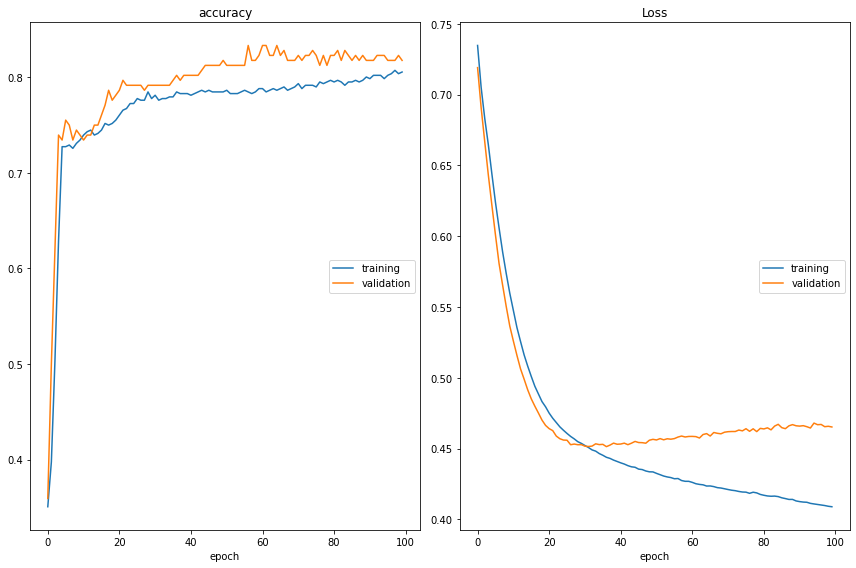

accuracy
	training         	 (min:    0.351, max:    0.807, cur:    0.806)
	validation       	 (min:    0.359, max:    0.833, cur:    0.818)
Loss
	training         	 (min:    0.409, max:    0.735, cur:    0.409)
	validation       	 (min:    0.451, max:    0.719, cur:    0.465)
18/18 [==============================] - 0s 22ms/step - loss: 0.4090 - accuracy: 0.8056 - val_loss: 0.4653 - val_accuracy: 0.8177


In [16]:
model.fit(x_train_std,y_train,epochs=100,validation_data=(x_test_std,y_test),callbacks=[PlotLossesKerasTF()])

In [17]:
from sklearn.metrics import classification_report

In [18]:
t= model.predict(x_test_std)

In [21]:
t

array([[0.98018384],
       [0.07595021],
       [0.06529328],
       [0.58936465],
       [0.11903757],
       [0.01412484],
       [0.79074866],
       [0.7731432 ],
       [0.6615243 ],
       [0.41079506],
       [0.6694412 ],
       [0.9074451 ],
       [0.28211772],
       [0.44915438],
       [0.287236  ],
       [0.3039148 ],
       [0.86876464],
       [0.00512925],
       [0.22028834],
       [0.34513968],
       [0.8322226 ],
       [0.30614555],
       [0.25141752],
       [0.33821025],
       [0.00932303],
       [0.34538066],
       [0.01664555],
       [0.904273  ],
       [0.05099815],
       [0.06380033],
       [0.4586166 ],
       [0.17206937],
       [0.0765405 ],
       [0.73333704],
       [0.0243113 ],
       [0.89974   ],
       [0.49398246],
       [0.03315017],
       [0.36648965],
       [0.9102449 ],
       [0.23676872],
       [0.1821222 ],
       [0.14704931],
       [0.94883025],
       [0.8312763 ],
       [0.00297439],
       [0.02110469],
       [0.123

In [19]:
print(type(y_test))

<class 'pandas.core.series.Series'>


In [20]:
print(len(t))

192


In [22]:
t1 = []
for i in range(len(t)):
    if t[i] >= 0.5:
        t1.append(1)
    else:
        t1.append(0)

In [23]:
t1

[1,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0]

In [25]:
new_pred = pd.Series(t1)  
print(new_pred)

0      1
1      0
2      0
3      1
4      0
      ..
187    0
188    1
189    0
190    0
191    0
Length: 192, dtype: int64


In [24]:
y_test

661    1
122    0
113    0
14     1
529    0
      ..
366    1
301    1
382    0
140    0
463    0
Name: Outcome, Length: 192, dtype: int64

In [ ]:
type(y_test)

In [26]:
print(classification_report(y_test,new_pred))

              precision    recall  f1-score   support

           0       0.85      0.88      0.87       130
           1       0.74      0.68      0.71        62

    accuracy                           0.82       192
   macro avg       0.79      0.78      0.79       192
weighted avg       0.81      0.82      0.82       192



In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,new_pred)

In [ ]:
conf = confusion_matrix(y_test,new_pred)

tp,fp,fn,tn = confusion_matrix(y_test,new_pred).ravel()
specificity = tn / (tn+fp)
sensitivity= tp / (tp+fn)
print('TP,FP,FN,TN',tp,fp,fn,tn)
print('sensitivity =', sensitivity)
print('specificity =', specificity)

In [ ]:
from sklearn.metrics import roc_auc_score
auc_score1 = roc_auc_score(y_test, new_pred)
print('roc_auc_score is',auc_score1)

# Precison and Recall

In [ ]:
from tensorflow.keras.metrics import Precision, Recall

In [ ]:
model=Sequential()
model.add(Input(shape=(8,),name="Input Layer"))
model.add(Dense(10,activation='relu',name="Hidden1"))model.add(Dense(12,activation='relu',name="Hidden2"))
model.add(Dense(1,activation='sigmoid',name='OutputLayer'))
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy',Precision(),Recall()])
model.fit(x_train_std,y_train,epochs=50,batch_size=20, validation_data=(x_test_std,y_test),callbacks=[PlotLossesKerasTF()])